<h3>Problem Statement</h3>

This dataset contains the medical costs paid by an insurance company for their beneficiaries, with some personal information about the beneficiary.

<strong> Evaluation</strong>: R$^2$

**`Variable Definitions`**
* `age: Age of primary beneficiary`
* `sex: Insurance contractor gender- Female or Male`
* `bmi: Body Mass index of beneficiary (In kg/m^2`
* `children: Number of children covered by the insrance/ Number of dependents`
* `smoker: Beneficiary a smoker or not`
* `region: Beneficiary's residential area in the US- NorthEast, SouthEast, SouthWest, NorthWest`
* `charges (Target): Individual medical costs billed by the health insurance`

In [1]:
path = "C:/Machine_learning_datafiles/datasheets/HealthInsurance"

In [2]:
import os, gc, warnings
warnings.filterwarnings('ignore')

In [3]:
#Data wrangling and visualisations packages
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scipy_stats
import matplotlib.pyplot as plt

In [4]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet
from sklearn.linear_model import BayesianRidge, SGDRegressor, HuberRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.model_selection import cross_val_score, train_test_split, RepeatedKFold

In [5]:
%matplotlib inline
pd.set_option('display.max_columns', 50)
plt.style.use('bmh')

In [6]:
os.chdir(path)

In [7]:
data = pd.read_table('insurance.txt', sep=',')

In [8]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
data.shape

(1338, 7)

In [10]:
data.isna().any().sum()

0

**No missing value in data**

**`Univariate analysis`**

In [11]:
data.describe(percentiles=[0.25, 0.5, 0.75, 0.95]).T

,count,mean,std,min,25%,50%,75%,95%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,62.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,41.106000,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,3.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,41181.827787,63770.42801


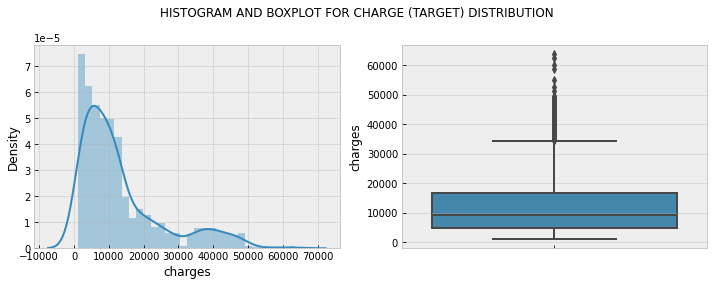

In [12]:
#Target Distribution
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(data.charges)
plt.subplot(122)
sns.boxplot(y=data.charges)
plt.suptitle('Histogram and Boxplot for Charge (Target) Distribution'.upper(), fontsize=12)
plt.tight_layout(pad=1.);

In [13]:
data.charges.apply(['min', 'mean', 'median', 'max', 'skew', 'kurtosis'])

min          1121.873900
mean        13270.422265
median       9382.033000
max         63770.428010
skew            1.515880
kurtosis        1.606299
Name: charges, dtype: float64

From the skew and kurtosis, we can say that the data is right skewed and heavily right tailed.

**Since the dataset is a small one, we can use the linear models or a decision tree model (eg randomforest)**

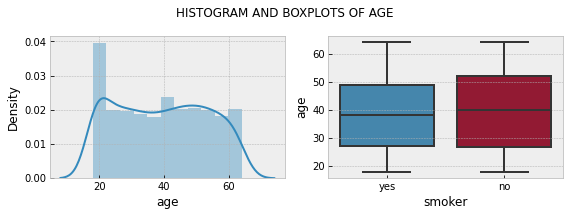

In [14]:
fig, ax = plt.subplots(1,2,figsize=(8,3))
sns.distplot(data.age, ax=ax[0])
sns.boxplot(x='smoker', y= 'age', data=data, ax=ax[1])
plt.suptitle('Histogram and Boxplots of Age'.upper(), fontsize=12)
plt.tight_layout(pad=1.);

Age doesn't contain any outliers. In this dataset most beneficiaries are from the ages of 18-~22

**Median age is about 40years**

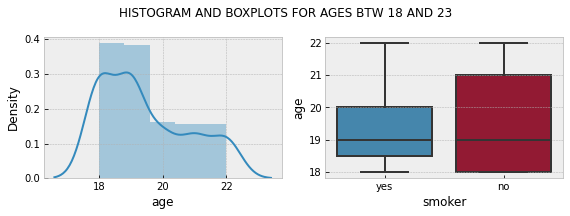

In [15]:
fig, ax = plt.subplots(1,2,figsize=(8,3))
sns.distplot(data[data.age < 23].age, ax=ax[0])
sns.boxplot(x='smoker', y= 'age', data=data[data.age < 23], ax=ax[1])
plt.suptitle('Histogram and Boxplots for Ages btw 18 and 23'.upper(), fontsize=12)
plt.tight_layout(pad=1.);

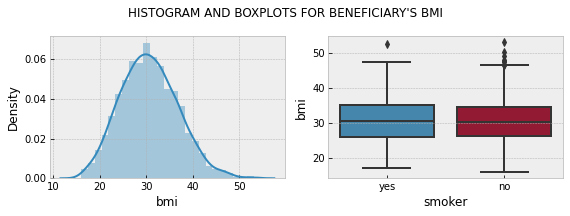

In [16]:
fig, ax = plt.subplots(1,2,figsize=(8,3))
sns.distplot(data.bmi, ax=ax[0])
sns.boxplot(x='smoker', y='bmi', data= data, ax=ax[1])
plt.suptitle('Histogram and Boxplots for Beneficiary\'s BMI'.upper(), fontsize=12)
plt.tight_layout(pad=1.);

BMI is normally distributed

**Median BMI value is ~31kg/$m^2$**

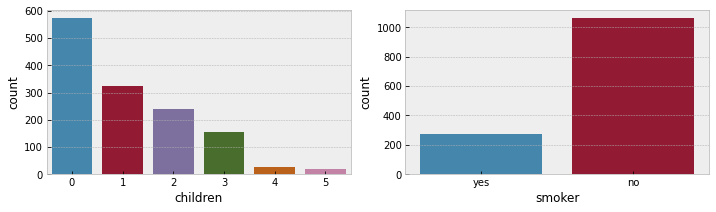

In [17]:
fig, ax = plt.subplots(1,2,figsize=(10,3))
sns.countplot(data.children, ax=ax[0])
sns.countplot(data.smoker, ax=ax[1])
plt.tight_layout(pad=0.9);

**Most of the beneficiaries have no children and are not smokers**

Less beneficiaries have children more than three (3).

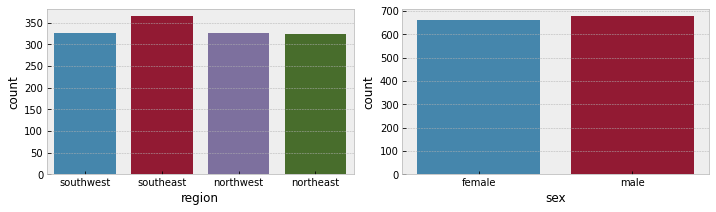

In [18]:
fig, ax = plt.subplots(1,2,figsize=(10,3))
sns.countplot(data.region, ax=ax[0])
sns.countplot(data.sex, ax=ax[1])
plt.tight_layout(pad=0.9);

**The distribution of beneficiaries across regions is comparable. Similar to their Gender**

**`Bivariate Analysis`**

**`Medical costs across regions, by sex and smoker (Y/N)`**

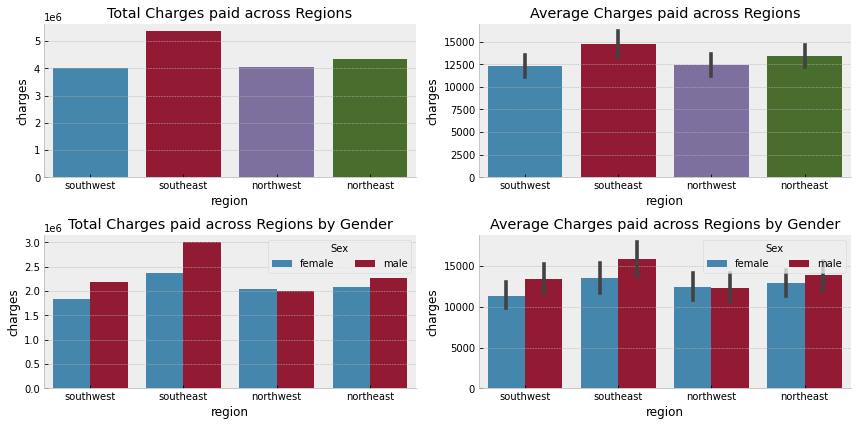

In [19]:
#Total and Average Insurance costs paid across regions
fig, ax= plt.subplots(2,2, figsize=(12,6))
sns.barplot('region', 'charges', data=data, estimator=np.sum, ci=None, ax=ax[0,0])
sns.barplot('region', 'charges', data=data, ax=ax[0,1])
sns.barplot('region', 'charges', data=data, hue='sex', ax=ax[1,0], estimator=np.sum, ci=None)
sns.barplot('region', 'charges', data=data, hue='sex', ax=ax[1,1])
ax[0,0].set(title='Total Charges paid across Regions')
ax[0,1].set(title='Average Charges paid across Regions')
ax[1,0].set(title='Total Charges paid across Regions by Gender')
ax[1,1].set(title='Average Charges paid across Regions by Gender')
ax[1,0].legend(title='Sex', ncol=2, loc='upper right')
ax[1,1].legend(title='Sex', ncol=2, loc='upper right')
plt.tight_layout(pad=1.)
sns.despine();

`More medical costs have been paid by the insurance company for beneficiaries leaving in the SE of the country`

`For almost all regions, medical costs have been paid for Males than Females`

**`Medical costs by sex and smoker (Y/N)`**

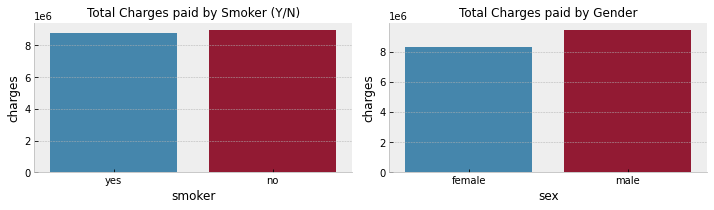

In [20]:
fig, ax= plt.subplots(1,2, figsize=(10,3))
sns.barplot('smoker', 'charges', data=data, ax=ax[0], estimator=np.sum, ci=None)
sns.barplot('sex', 'charges', data=data, ax=ax[1], estimator=np.sum, ci=None)
ax[0].set_title('Total Charges paid by Smoker (Y/N)', fontsize=12)
ax[1].set_title('Total Charges paid by Gender', fontsize=12)
plt.tight_layout(pad=1.)
sns.despine();

`The total charges paid for beneficiaries whi are smokers or non-smokers is relatively comparable.`

`More Males have incurred medical costs than females`

**`Medical costs across regions by smoker(Y/N)`**

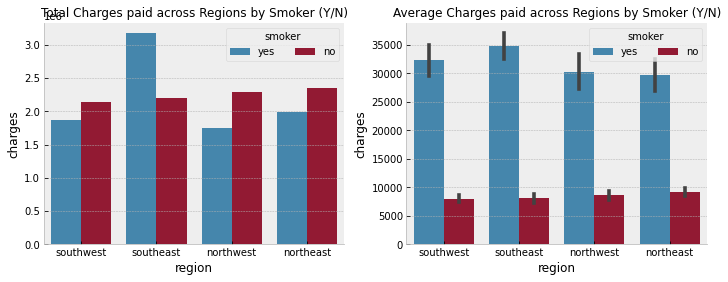

In [21]:
fig, ax= plt.subplots(1,2, figsize=(10,4))
sns.barplot('region', 'charges', data=data, hue='smoker', ax=ax[0], estimator=np.sum, ci=None)
sns.barplot('region', 'charges', data=data, hue='smoker', ax=ax[1])
ax[0].set_title('Total Charges paid across Regions by Smoker (Y/N)', fontsize=12)
ax[1].set_title('Average Charges paid across Regions by Smoker (Y/N)', fontsize=12)
ax[0].legend(title='smoker', ncol=2, loc='upper right')
ax[1].legend(title='smoker', ncol=2, loc='upper right')
sns.despine()
plt.tight_layout(pad=1.);

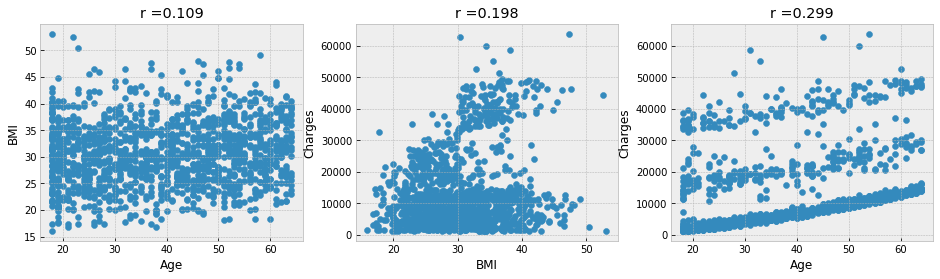

In [22]:
fig, ax = plt.subplots(1,3,figsize=(16,4))
ax[0].scatter('age', 'bmi', data=data)
ax[0].set(xlabel='Age', ylabel='BMI')
ax[0].set_title('r ={}'.format(scipy_stats.pearsonr(data.age,data.bmi)[0].round(3)));
ax[1].scatter('bmi', 'charges', data=data)
ax[1].set(xlabel='BMI', ylabel='Charges')
ax[1].set_title('r ={}'.format(scipy_stats.pearsonr(data.bmi,data.charges)[0].round(3)))
ax[2].scatter('age', 'charges', data=data)
ax[2].set(xlabel='Age', ylabel='Charges')
ax[2].set_title('r ={}'.format(scipy_stats.pearsonr(data.age,data.charges)[0].round(3)));

* `There's a weak relationship btw the BMI and Age of beneficiaries. The same for BMI and Charges and b/w Age and Charges.`
* `For the r/ship b/w BMI and Charges, there seems to be two distributions, where one is there's a strong relationship btw Charges and BMI and the other where there's no r/ship at all. I suspect it is the distribution for beneficiaries that are smokers. This is expected because smoking may result to other life-threatening health issues`
* `For the r/ship b/w Age and Charges, there's a relationship, albeit weak. There seems to be three distributions there.`

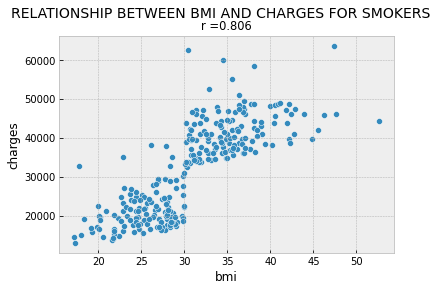

In [23]:
sns.scatterplot(x='bmi', y='charges', data=data[data.smoker == 'yes'])
plt.title('r ={}'.format(scipy_stats.pearsonr(
    data[data.smoker == 'yes'].bmi, data[data.smoker == 'yes'].charges)[0].round(3)), fontsize=11.5)
plt.suptitle('Relationship between BMI and Charges for smokers'.upper(), fontsize=14);

`We see that the second distribution in the scatterplot b/w BMI and Charges for smokers. There's a strong relationship btw those BMI of those that smoke and the medical charges paid for such beneficiaries.`

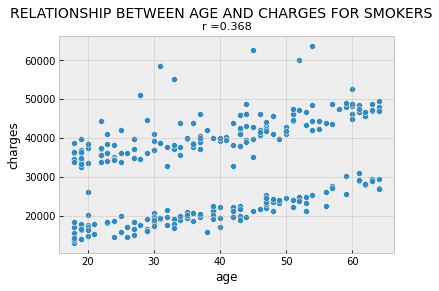

In [24]:
sns.scatterplot(x='age', y='charges', data=data[data.smoker == 'yes'])
plt.title('r ={}'.format(scipy_stats.pearsonr(
    data[data.smoker == 'yes'].age, data[data.smoker == 'yes'].charges)[0].round(3)), fontsize=11.3)
plt.suptitle('Relationship between Age and Charges for smokers'.upper(), fontsize=14);

`The two distributions belong to individuals that are smokers. In one, there's a relationship btw charges paid less than 31000 and the ages of the individuals and in another is a relationship btw charges paid 30000 and above, and the ages of individuals.`

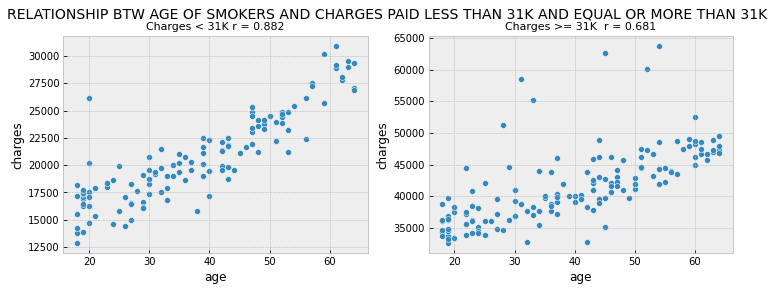

In [25]:
plt.figure(figsize=(12,4))
plt.subplot(121)

sns.scatterplot(x='age', y='charges', data=data[(data.smoker == 'yes') & (data.charges < 31e3)])
plt.title('Charges < 31K r = {}'.format(scipy_stats.pearsonr(
    data[(data.smoker == 'yes') & (data.charges < 31e3)].age, 
    data[(data.smoker == 'yes') & (data.charges < 31e3)].charges)[0].round(3)), fontsize=11)

plt.subplot(122)
sns.scatterplot(x='age', y='charges', data=data[(data.smoker == 'yes') & (data.charges >= 31e3)])
plt.title('Charges >= 31K  r = {}'.format(scipy_stats.pearsonr(
    data[(data.smoker == 'yes') & (data.charges > 31e3)].age, 
    data[(data.smoker == 'yes') & (data.charges > 31e3)].charges)[0].round(3)), fontsize=11)

plt.suptitle('Relationship btw age of smokers and charges paid less than 31K and equal or more than 31K'.upper(), fontsize=14);

* `In both distributions we see that there is a relationship btw ages and charges paid for smokers.`
* `There's a strong r/ship for charges less than 31K and the ages of smokers and a moderate r/ship when the charges are equal to or greater than 31K.`

`The charges paid by an insurance company is also dependent on the severity of the disease`

`Let's poke further into the BMI for smokers when the charges are < 31K and >= 31K`

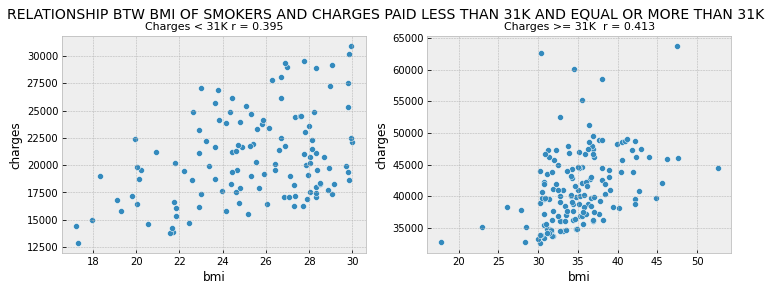

In [26]:
plt.figure(figsize=(12,4))
plt.subplot(121)

sns.scatterplot(x='bmi', y='charges', data=data[(data.smoker == 'yes') & (data.charges < 31e3)])
plt.title('Charges < 31K r = {}'.format(scipy_stats.pearsonr(
    data[(data.smoker == 'yes') & (data.charges < 31e3)].bmi, 
    data[(data.smoker == 'yes') & (data.charges < 31e3)].charges)[0].round(3)), fontsize=11)

plt.subplot(122)
sns.scatterplot(x='bmi', y='charges', data=data[(data.smoker == 'yes') & (data.charges >= 31e3)])
plt.title('Charges >= 31K  r = {}'.format(scipy_stats.pearsonr(
    data[(data.smoker == 'yes') & (data.charges > 31e3)].bmi, 
    data[(data.smoker == 'yes') & (data.charges > 31e3)].charges)[0].round(3)), fontsize=11)

plt.suptitle('Relationship btw bmi of smokers and charges paid less than 31K and equal or more than 31K'.upper(), fontsize=14);

`There's a weak relationship for both criteria.`

**`Feature Engineering Tips`**
* `Interaction features for (age and bmi, smoker and bmi, smoker and age, smoker and gender)`
* `Binning age and bmi.`

**Categorical Encoding**

In [27]:
data.sex.replace({'female' : 0, 'male':1}, inplace=True)
data.smoker.replace({'no' : 0, 'yes' : 1}, inplace=True)
data.region.replace({'southeast' : 1, 'southwest':2, 'northeast':3, 'northwest':4}, inplace=True)

In [28]:
age_bin = pd.cut(data.age, [17, 35, 55, 65], labels=['Young Adults', 'Senior Adults', 'Elderly'])
bmi_bin = pd.cut(data.bmi, [0, 18.6, 25, 30, 100], labels=['Underweight', 'Healthy', 'Overweight', 'Obese'])

abcs = pd.concat([age_bin, bmi_bin, data.charges, data.smoker],axis=1)

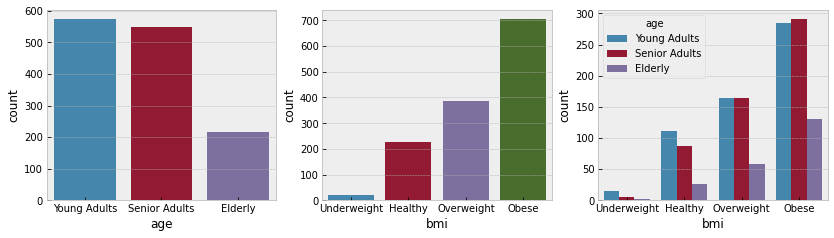

In [29]:
plt.figure(figsize=(14,3.5))
plt.subplot(131)
sns.countplot(age_bin)
plt.subplot(132)
sns.countplot(bmi_bin)
plt.subplot(133)
sns.countplot('bmi', hue='age', data=abcs);

**`Most medical cost beneficiaries are the Young Adults and the Senior Adults, and the Obese individuals`**

**`For all Age groups, there are more obese individuals than any other weight group`**

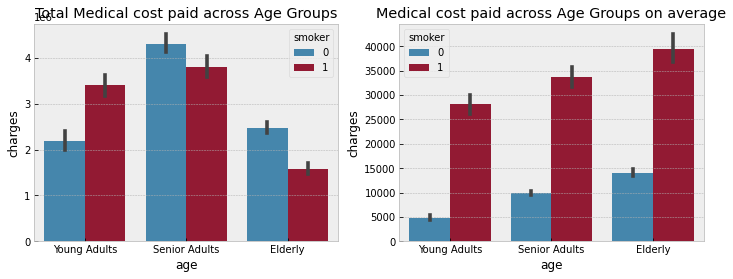

In [30]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.barplot('age', 'charges', data=abcs, hue='smoker', estimator=np.sum)
plt.title('Total Medical cost paid across Age Groups')
plt.subplot(122)
sns.barplot('age', 'charges', data=abcs, hue='smoker')
plt.title('Medical cost paid across Age Groups on average');

**`On Average the amount paid by the insurance company across age groups is more on Individuals that are smokers (>25K).
On the other side, the total amount of insurance costs paid have been paid for Senior Adults (Ages 36-55)`**

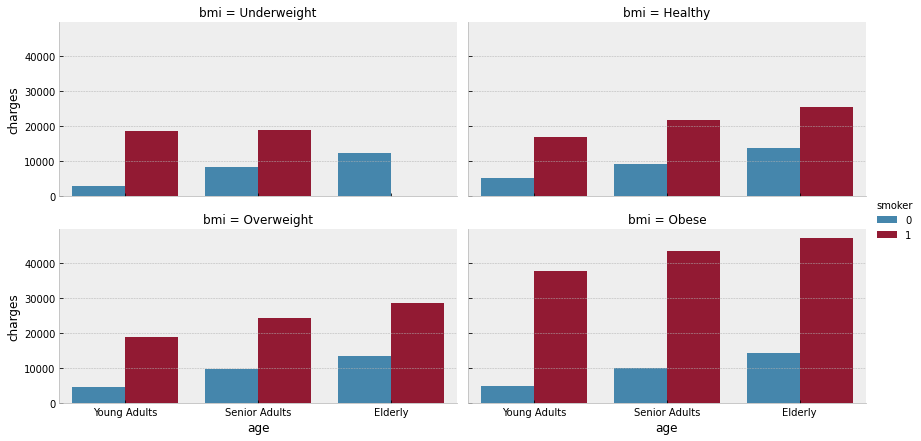

In [31]:
sns.catplot('age', 'charges', data=abcs, col= 'bmi', hue='smoker', col_wrap=2, kind='bar', height=3, ci=None,
            aspect=2.0);

**`There are little or no underweight Elders who are smokers. For all Age groups, more medical cost have been paid, on average, with obesed Elders incurring up to 60K on average`**

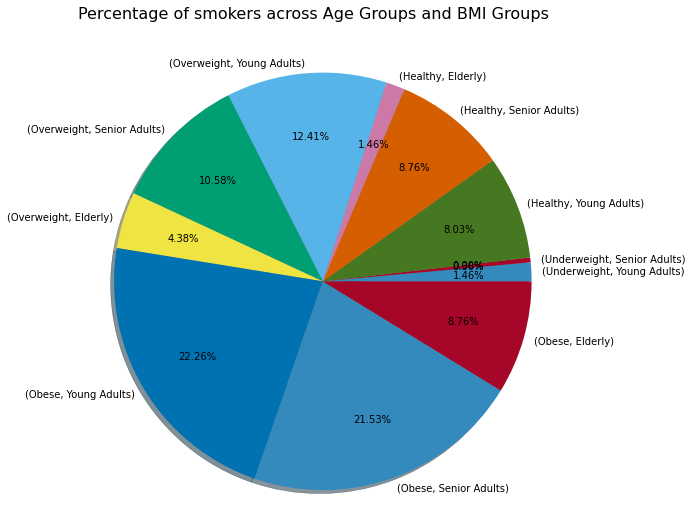

In [32]:
abcs.groupby(['bmi','age']).smoker.sum().transform(lambda x: x/x.sum()).plot.pie(
    figsize=(10,8), autopct='%.2f%%', ylabel='',pctdistance=0.7, radius=1.2, labeldistance=1.05,shadow=True)
plt.suptitle('Percentage of smokers across Age Groups and BMI Groups', fontsize=16);

**`There are more Obese, Young adults who are smokers, followed by Obese-Senior Adults. These individuals are at greater risk of developing severe health complications such as diabetes, CVDs, cancer etc that are associated with obesity. This surge in number of adult smokers could be as a result of lifestyle and peer influence etc`** 

**`Feature Engineering`**

In [33]:
data['bmi_age'] = data.bmi *  data.age
data['smoker_bmi'] = data.bmi * data.smoker
data['sex_smoker'] = data.sex * data.smoker
data['smoker_age'] = data.smoker * data.age

In [34]:
#one hot encoding region
data = pd.get_dummies(data, columns=['region', 'smoker', 'sex'])

**`Correlation Matrix`**

In [35]:
corr = data.corr()
mask= np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

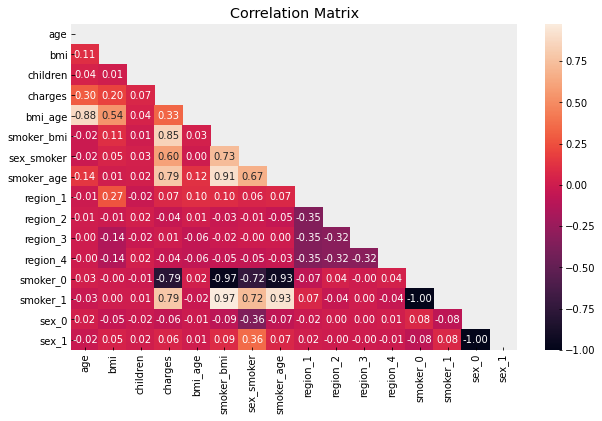

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f')
plt.title('Correlation Matrix');

In [37]:
X = data.drop(['charges', 'sex_0', 'smoker_0', 'region_4'], axis=1)
y = data.charges

In [38]:
#for reproducibility
seed= 104

In [39]:
xtrain, xtest, ytrain, ytest= train_test_split(X,y, random_state=seed, test_size=0.25, shuffle=True)

In [40]:
xtrain.shape, xtest.shape

((1003, 12), (335, 12))

`Instantiating Regressor models`

In [41]:
linreg = LinearRegression()
ridge = Ridge(random_state=seed, alpha=0.1)
lasso = Lasso(random_state=seed, alpha=0.05)
elastic = ElasticNet(random_state=seed, alpha=0.001, l1_ratio=0.5)
huber = HuberRegressor(max_iter=500, alpha=0.0001, epsilon=3.5)
sgd = SGDRegressor(random_state=seed, n_iter_no_change=5, max_iter=1000, average=True, eta0=0.02, learning_rate='adaptive')
bayes = BayesianRidge(n_iter=500)

In [42]:
transform = ['age', 'bmi', 'bmi_age', 'smoker_bmi', 'smoker_age']
dont = [col for col in xtrain.columns if col not in transform]

In [43]:
scaler = StandardScaler()
minscale = MinMaxScaler()

trans = ColumnTransformer(transformers=[
    ('transform', scaler , transform),
], remainder='passthrough', n_jobs=-1)

In [44]:
def modelEval(model, x, y):
    mae = mean_absolute_error(y, model.predict(x))
    rmse = mean_squared_error(y, model.predict(x), squared=False)
    return mae, rmse

In [45]:
trans.fit(xtrain)
xtrain_scaled = pd.DataFrame(trans.transform(xtrain), columns=transform+dont)
xtest_scaled = pd.DataFrame(trans.transform(xtest), columns=transform+dont)

In [46]:
features = xtrain_scaled.columns

In [47]:
rcv = RepeatedKFold(random_state=seed, n_repeats=15)

In [48]:
def adjustedR2(model, x, y):
    r2 = model.score(x, y)
    n, p = x.shape
    adj_r2 = 1 - ((1- r2)*(n-1)/(n-p-1))
    return adj_r2

In [49]:
def train_model(model, xtr, xte):
    model.fit(xtr, ytrain)
    tr_mae, tr_rmse = modelEval(model, xtr, ytrain)
    test_mae, test_rmse = modelEval(model, xte, ytest)
    tr_r2 = model.score(xtr, ytrain)
    te_r2 = model.score(xte, ytest)
    tr_adjR2 = adjustedR2(model, xtr, ytrain)
    te_adjR2 = adjustedR2(model, xte, ytest)
    
    print('Train ==> MAE : {:.5f} RMSE: {:.5f}'.format(tr_mae, tr_rmse))
    print('Train ==> R2 : {:.5f} AdjR2: {:.5f}'.format(tr_r2, tr_adjR2))
    print()
    print('Test ==>{:.5f}  RMSE: {:.5f}'.format(test_mae, test_rmse))
    print('Test ==> R2 : {:.5f} AdjR2: {:.5f}'.format(te_r2, te_adjR2))

In [50]:
def crossValScores(model, xtr, cv=rcv):
    cvs = cross_val_score(model, xtr, ytrain, cv=cv, n_jobs=-1, scoring='r2')
    cvs_mean = cvs.mean()
    cvs_std = cvs.std()
    print('CV RSq. : {:.6f} +- {:.6f}'.format(cvs_mean, cvs_std))

In [51]:
def plotCoefficients(model):
    if 'sgd' in model.__class__.__name__.lower():
        coefs = pd.Series(model.average_coef_, index=features).sort_values()
    else:
        coefs = pd.Series(model.coef_.ravel(), index=features).sort_values()
    return coefs.plot.barh(title=model.__class__.__name__)

**`Cross Validation`**

In [52]:
%%time
crossValScores(linreg, xtrain_scaled)

CV RSq. : 0.844902 +- 0.028235
Wall time: 505 ms


In [53]:
%%time
crossValScores(ridge, xtrain_scaled)

CV RSq. : 0.844918 +- 0.028267
Wall time: 379 ms


In [54]:
%%time
crossValScores(lasso, xtrain_scaled)

CV RSq. : 0.844904 +- 0.028235
Wall time: 552 ms


In [55]:
%%time
crossValScores(bayes, xtrain_scaled)

CV RSq. : 0.844737 +- 0.028335
Wall time: 431 ms


In [56]:
%%time
crossValScores(huber, xtrain_scaled)

CV RSq. : 0.844974 +- 0.028546
Wall time: 1.44 s


In [57]:
%%time
crossValScores(sgd, xtrain_scaled)

CV RSq. : 0.844101 +- 0.028376
Wall time: 3.71 s


In [58]:
%%time
crossValScores(elastic, xtrain_scaled)

CV RSq. : 0.844817 +- 0.028355
Wall time: 618 ms


**`Training and Evaluation`**

In [59]:
train_model(linreg, xtrain_scaled, xtest_scaled)

Train ==> MAE : 2774.99161 RMSE: 4688.71395
Train ==> R2 : 0.85081 AdjR2: 0.84900

Test ==>2989.87758  RMSE: 5241.61470
Test ==> R2 : 0.80935 AdjR2: 0.80224


In [60]:
train_model(ridge, xtrain_scaled, xtest_scaled)

Train ==> MAE : 2774.72399 RMSE: 4688.84523
Train ==> R2 : 0.85080 AdjR2: 0.84899

Test ==>2989.63652  RMSE: 5242.33025
Test ==> R2 : 0.80930 AdjR2: 0.80219


In [61]:
train_model(elastic, xtrain_scaled, xtest_scaled)

Train ==> MAE : 2774.44873 RMSE: 4691.52975
Train ==> R2 : 0.85063 AdjR2: 0.84882

Test ==>2995.27040  RMSE: 5246.88272
Test ==> R2 : 0.80897 AdjR2: 0.80185


In [62]:
train_model(huber, xtrain_scaled, xtest_scaled)

Train ==> MAE : 2710.02577 RMSE: 4692.32455
Train ==> R2 : 0.85058 AdjR2: 0.84877

Test ==>2934.51132  RMSE: 5254.19358
Test ==> R2 : 0.80843 AdjR2: 0.80129


In [63]:
train_model(bayes, xtrain_scaled, xtest_scaled)

Train ==> MAE : 2774.35847 RMSE: 4690.59097
Train ==> R2 : 0.85069 AdjR2: 0.84888

Test ==>2993.31142  RMSE: 5245.54314
Test ==> R2 : 0.80906 AdjR2: 0.80195


In [64]:
train_model(lasso, xtrain_scaled, xtest_scaled)

Train ==> MAE : 2774.96652 RMSE: 4688.71407
Train ==> R2 : 0.85081 AdjR2: 0.84900

Test ==>2989.80808  RMSE: 5241.59385
Test ==> R2 : 0.80935 AdjR2: 0.80225


In [65]:
train_model(sgd, xtrain_scaled, xtest_scaled)

Train ==> MAE : 2771.03628 RMSE: 4691.71033
Train ==> R2 : 0.85062 AdjR2: 0.84880

Test ==>2995.58225  RMSE: 5249.07971
Test ==> R2 : 0.80881 AdjR2: 0.80168


**`Plot Importance`**

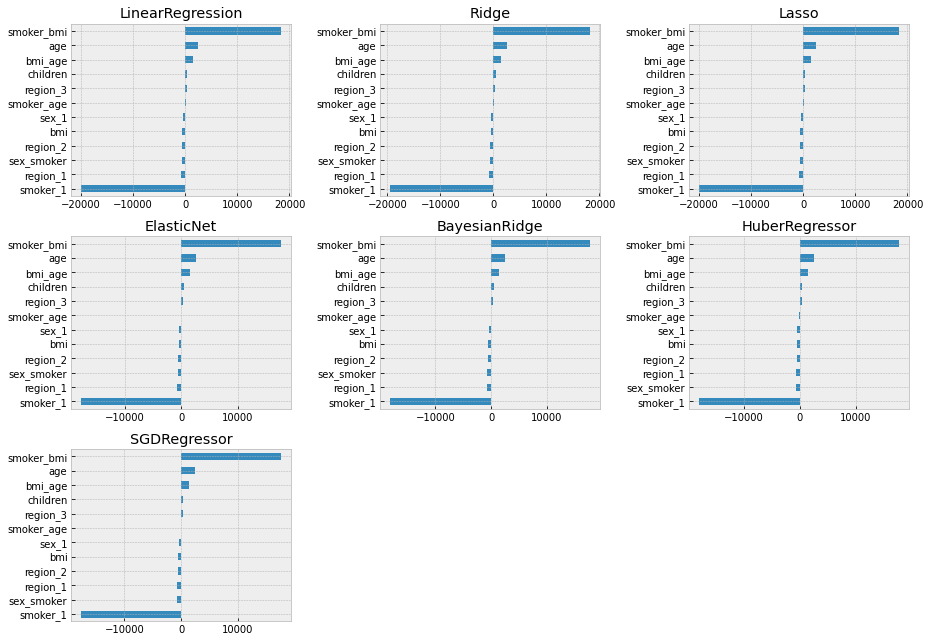

In [66]:
plt.figure(figsize=(13,9))
for i, model in enumerate([linreg, ridge, lasso, elastic, bayes, huber, sgd], start=1):
    plt.subplot(3,3,i)
    plotCoefficients(model)
plt.tight_layout(pad=1.);

**`Plots`**

In [67]:
def residual_plots(model, x, y):
    residual = y - model.predict(x)
    plot = plt.scatter(y, residual, c= '#ddb321', alpha=0.7)
    plt.axhline(0, color='r', ls='--')
    plt.title('Residual plot for '+model.__class__.__name__)

In [68]:
def explained_VarPlot(model, x, y):
    explained_variance_score(y, model.predict(x))
    plot = plt.scatter(y, model.predict(x), c='#de2341', alpha=0.7)
    plt.title('R/ship btw actual and predicted\nvalues for '+model.__class__.__name__)

***`Relationship btw Actual and Predicted values`***

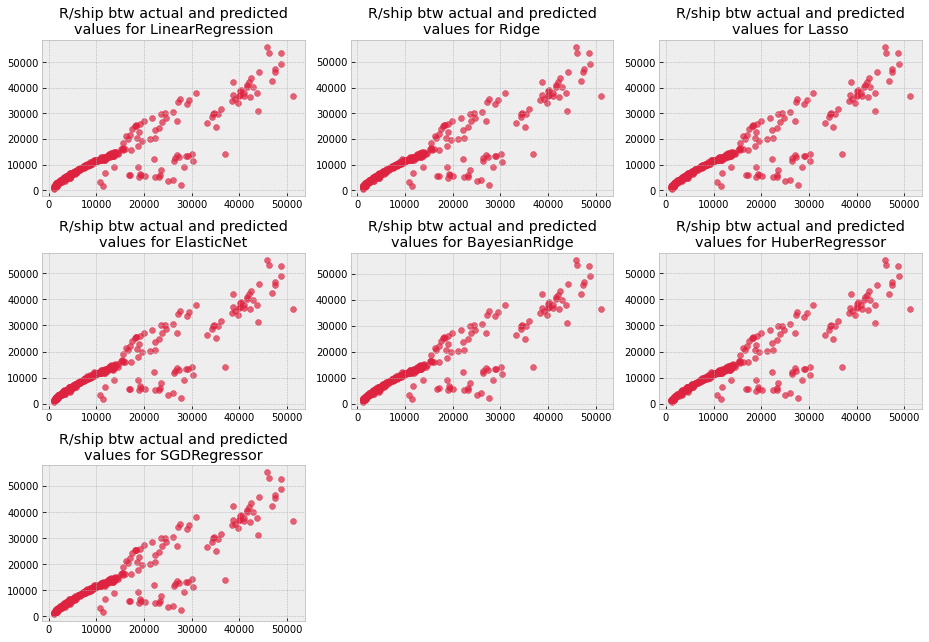

In [69]:
plt.figure(figsize=(13,9))
for i, model in enumerate([linreg, ridge, lasso, elastic, bayes, huber, sgd], start=1):
    plt.subplot(3,3,i)
    explained_VarPlot(model, xtest_scaled, ytest)
plt.tight_layout(pad=1.);

***`Residual Plots`***

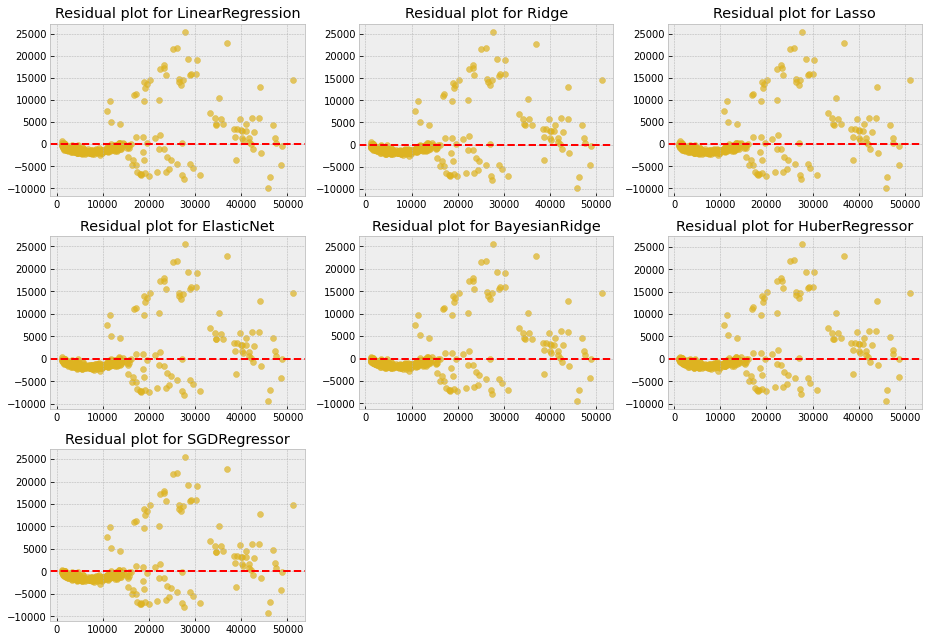

In [70]:
plt.figure(figsize=(13,9))
for i, model in enumerate([linreg, ridge, lasso, elastic, bayes, huber, sgd], start=1):
    plt.subplot(3,3,i)
    residual_plots(model, xtest_scaled, ytest)
plt.tight_layout(pad=1.);

**`The distributions seem to be random, hence linear models is appropriate to model`**

**`Adding second-degree order- For Age and BMI`**

In [71]:
def polynomialfeatures(model, xtr, xte):
    xtr_poly = pd.concat([xtr, xtr.age**2, xtr.bmi**2], axis=1)
    xte_poly = pd.concat([xte, xte.age**2, xte.bmi**2], axis=1)
#     xtr_poly['bias'] = 1 #adding bias term
#     xte_poly['bias'] = 1
    
    features = xtr.columns.tolist() + ['age^2', 'bmi^2']
    xtr_poly.columns = features
    xte_poly.columns = features
    train_model(model, xtr_poly, xte_poly)

In [72]:
polynomialfeatures(linreg, xtrain_scaled, xtest_scaled)

Train ==> MAE : 2732.06297 RMSE: 4622.27348
Train ==> R2 : 0.85500 AdjR2: 0.85295

Test ==>3072.14840  RMSE: 5201.98656
Test ==> R2 : 0.81222 AdjR2: 0.80401


In [73]:
polynomialfeatures(ridge, xtrain_scaled, xtest_scaled)

Train ==> MAE : 2731.18162 RMSE: 4622.40632
Train ==> R2 : 0.85500 AdjR2: 0.85294

Test ==>3072.18560  RMSE: 5202.68886
Test ==> R2 : 0.81217 AdjR2: 0.80395


In [74]:
polynomialfeatures(lasso, xtrain_scaled, xtest_scaled)

Train ==> MAE : 2732.01271 RMSE: 4622.27360
Train ==> R2 : 0.85500 AdjR2: 0.85295

Test ==>3072.09515  RMSE: 5201.95946
Test ==> R2 : 0.81222 AdjR2: 0.80401


In [75]:
polynomialfeatures(elastic, xtrain_scaled, xtest_scaled)

Train ==> MAE : 2730.36173 RMSE: 4625.12187
Train ==> R2 : 0.85483 AdjR2: 0.85277

Test ==>3075.23036  RMSE: 5207.22319
Test ==> R2 : 0.81184 AdjR2: 0.80361


In [76]:
polynomialfeatures(huber, xtrain_scaled, xtest_scaled)

Train ==> MAE : 2660.48214 RMSE: 4626.19096
Train ==> R2 : 0.85476 AdjR2: 0.85270

Test ==>3007.60979  RMSE: 5211.15388
Test ==> R2 : 0.81156 AdjR2: 0.80332


In [77]:
polynomialfeatures(bayes, xtrain_scaled, xtest_scaled)

Train ==> MAE : 2730.33582 RMSE: 4624.75965
Train ==> R2 : 0.85485 AdjR2: 0.85279

Test ==>3074.90977  RMSE: 5206.72408
Test ==> R2 : 0.81188 AdjR2: 0.80365


In [78]:
polynomialfeatures(sgd, xtrain_scaled, xtest_scaled)

Train ==> MAE : 2727.25593 RMSE: 4638.75891
Train ==> R2 : 0.85397 AdjR2: 0.85190

Test ==>3086.69348  RMSE: 5224.65982
Test ==> R2 : 0.81058 AdjR2: 0.80229


**`Plots`**

***`Residual Plots`***

In [79]:
xtrain_poly = pd.concat([xtrain_scaled, xtrain_scaled.age**2, xtrain_scaled.bmi**2], axis=1)
xtest_poly = pd.concat([xtest_scaled, xtest_scaled.age**2, xtest_scaled.bmi**2], axis=1)
xpoly_features = xtrain_scaled.columns.tolist()+['age^2', 'bmi^2']
xtrain_poly.columns = xpoly_features
xtest_poly.columns = xpoly_features

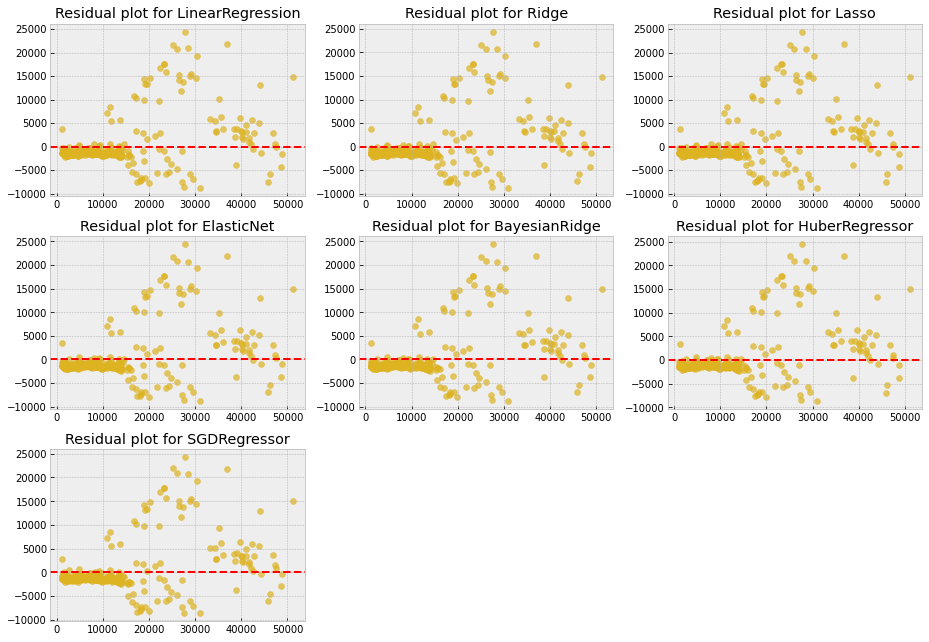

In [80]:
plt.figure(figsize=(13,9))
for i, model in enumerate([linreg, ridge, lasso, elastic, bayes, huber, sgd], start=1):
    plt.subplot(3,3,i)
    residual_plots(model, xtest_poly, ytest)
plt.tight_layout(pad=1.);

***`Relationship btw Actual and Predicted values`***

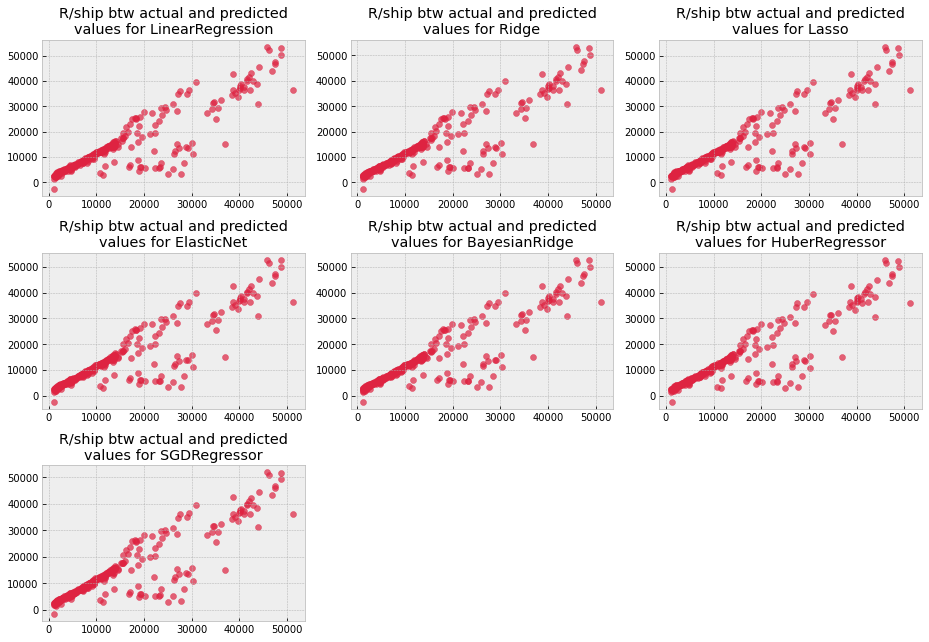

In [81]:
plt.figure(figsize=(13,9))
for i, model in enumerate([linreg, ridge, lasso, elastic, bayes, huber, sgd], start=1):
    plt.subplot(3,3,i)
    explained_VarPlot(model, xtest_poly, ytest)
plt.tight_layout(pad=1.);

In [82]:
gc.collect()

18040

**`Polynomial Features of age and BMI improved the test set than only the feature interactions created, although the percentage improvement wasn't that great. Hence a combination of polynomial featurs and feature interactions can improve the model.`**

`Other methods could be applied to improve the model: one of such is using the tree model. Another is feature selection techniques to select the most appropriate features that can effectively predict medical sales. This selection should be based on their Adjusted `R$^2$ `scores` `since it penalises the number of predictors`. `The `R$^2$` of a model increases with increased predictors, hence isn't a good metric for feature selection.`